In [20]:
from geopy import distance
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [21]:
def get_sites_location(spatial_scale, seed):
#     with open("../data/voronoi_tessellation_meta_{}_{}.pkl".format(spatial_scale, seed), "rb") as f:
#         tessellation_data = pickle.load(f)
        
    with open("../data/sims/1992_11_radius-{}_seed-{}.pkl".format(spatial_scale, seed), "rb") as f:
        sim_data = pickle.load(f)
        
#     present_sites = list(sim_data["gdp_sum"])
#     sites_location = [sim_data["site_location"][site_num] for site_num in present_sites]
    return sim_data["site_location"]

def get_pairwise_distance_between_sites(sites_location, lons, lats):
    all_dist = []
    for site_i in sites_location:
        site_i_lat, site_i_lon = lats[site_i], lons[site_i]
        tmp_dist = []
        for site_j in sites_location:
            site_j_lat, site_j_lon = lats[site_j], lons[site_j]
            tmp_dist.append(distance.distance((site_i_lat, site_i_lon), (site_j_lat, site_j_lon)).km)
        all_dist.append(tmp_dist)
    return all_dist

def plot_transfer_entropy_vs_distance(spatial_scales, temporal_scales, seed):
    for spatial_scale in spatial_scales:
        fig, axes = plt.subplots(1, len(temporal_scales), figsize=(15, 5), sharey=True)
        sites_location = get_sites_location(spatial_scale, seed)
        pairwise_dist = None

        for i, temporal_scale in enumerate(temporal_scales):
            transfer_entropy = pd.read_csv("../data/results/transfer_entropy/transfer_entropy_{}_{}_{}.csv".format(spatial_scale, temporal_scale, 1))
            if pairwise_dist is None:
                chosen_sites = [sites_location[int(i)] for i in transfer_entropy.columns]
                pairwise_dist = get_pairwise_distance_between_sites(chosen_sites, lons, lats)


            cols = [col for col in range(len(transfer_entropy.columns))]
            data = np.array(transfer_entropy)
            distances, entropies = [], []

            for j, col1 in enumerate(cols):
                for _, col2 in enumerate(cols[j+1:]):
                    tmp_distance = pairwise_dist[col1][col2]
                    max_entropy = max(data[col1, col2], data[col2, col1])
                    distances.append(tmp_distance)
                    entropies.append(max_entropy)
                
#             print("{}_{}".format(spatial_scale, temporal_scale), np.mean(data), np.std(data))
#             print()
                    
                    
            axes[i].scatter(distances, entropies)
#             if spatial_scale == 10.0:
#                 axes[i].scatter(distances, entropies)
#             else:
#                 sns.kdeplot(entropies, ax=axes[i], linestyle="--")
            axes[i].set_xlabel("Distance(in kms)")
            axes[i].set_ylabel("Transfer entropy")
            axes[i].set_ylim((0.0, 1.0))
            axes[i].set_title("Spatial: {}, temporal: {}".format(spatial_scale, temporal_scale))

#         plt.savefig("../data/pictures/transfer_entropy_vs_distance_spatial_{}_seed_{}.png".format(spatial_scale, seed), bbox_inches='tight')

In [22]:
lons, lats = np.load("../data/lons.npy"), np.load("../data/lats.npy")

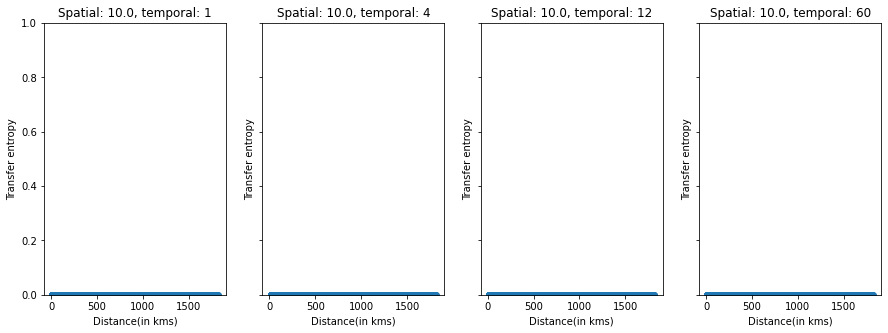

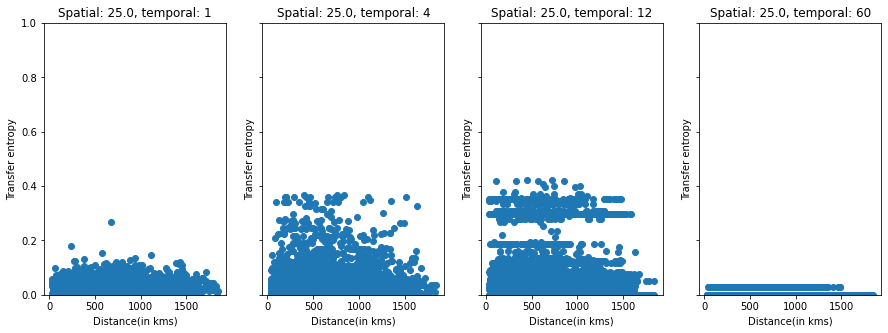

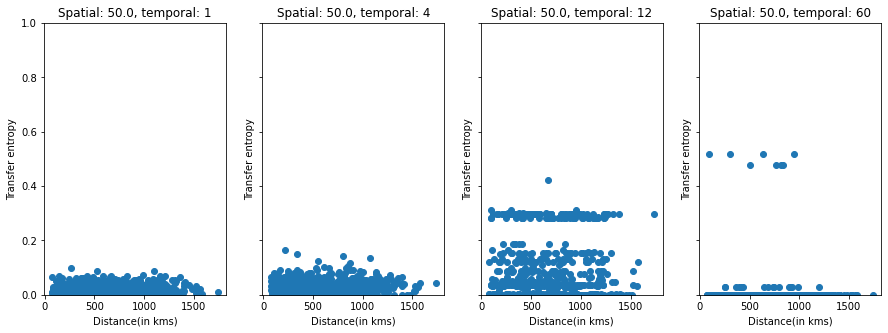

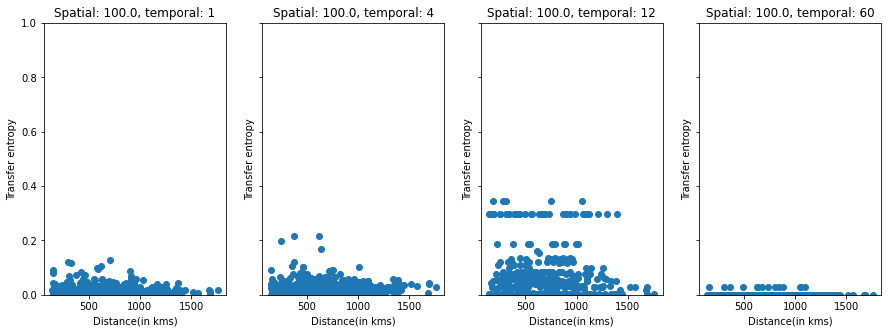

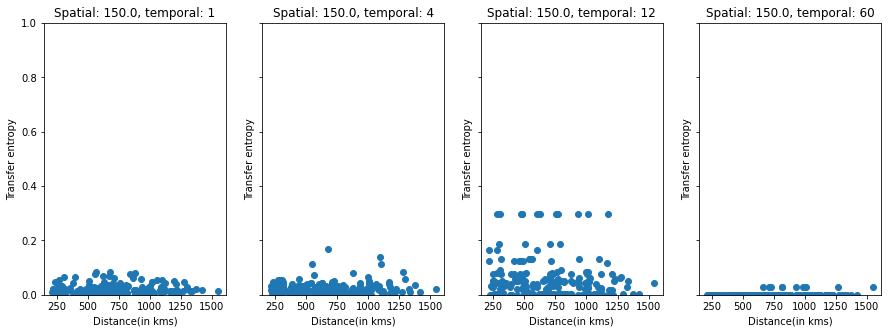

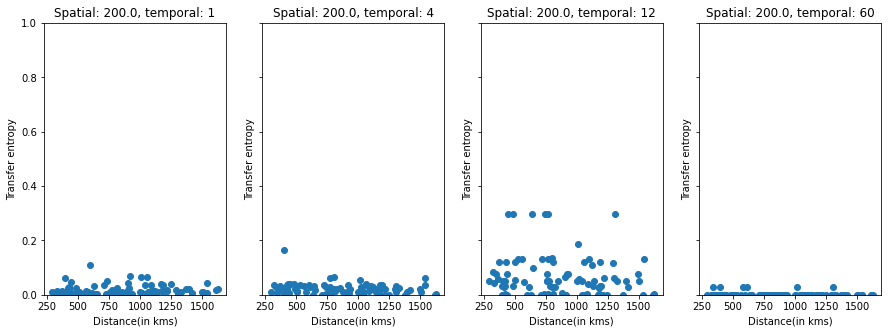

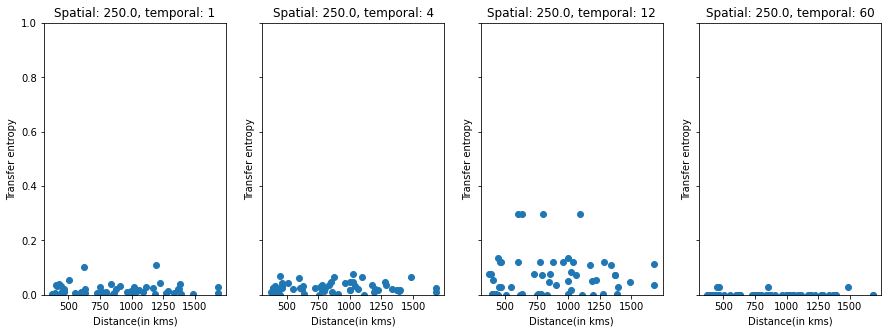

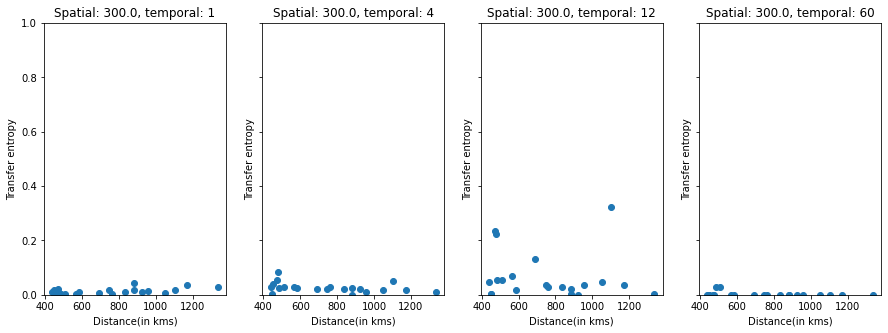

In [24]:
seed = 2
spatial_scales = [10.0, 25.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0]
temporal_scales = [1, 4, 12, 60]
plot_transfer_entropy_vs_distance(spatial_scales, temporal_scales, seed)